# K Means

This example will show how to apply k means under the assumption that we know the amount of clusters. Play around with this notebook. Set different priors, different sample data and so on, to get a feeling how this one works out.

## Steps
### 1. Initialize nodes
This one is crucial for k-Means. If the initial nodes are way to far off, than it won't work properly.  Also, you need to set the amount of clusters before hand. Hence, some prior knowledge (also called priors) are needed for this algorithm.
### 2. Assign each point to cluster
Just calculate the distance to each point. You can try out different ways of assignment. The easist one is just to cluster by smallest distance. The node with the smallest distance to a point will be assigned.
### 3. Calculate update
There are several smart updates (e.g. with momentum, clever weighting, ...). The easiest one is just to take the average of each point assigned to that node to calculate its new location.
### 4. Repeat assignment and update until convergence
One dumb way to define the end is just to iterate A LOT. Smart techniques check the delta in the update across the last iterations.

## Code example

In [1]:
import random
import copy
import numpy as np
import matplotlib.pyplot as plt

### Let's generate some sample data

In [24]:
# Generate Data
cluster_1 = np.random.normal(loc=(-3,8),
                             scale=10,
                             size=(1000,2))
cluster_2 = np.random.normal(loc=(-5,-5),
                             scale=10,
                             size=(1000,2))
cluster_3 = np.random.normal(loc=(10,-5),
                             scale=10,
                             size=(1000,2))

cluster_list = [cluster_1, cluster_2, cluster_3]
points = np.concatenate([cluster_1, cluster_2, cluster_3])

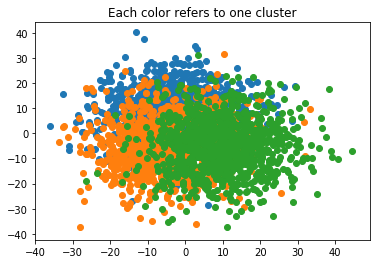

In [29]:
def plt_points(cluster_list):
    for cluster in cluster_list:
        plt.scatter(cluster[:, 0], cluster[:, 1])

plt_points(cluster_list)
plt.title("Each color refers to one cluster")
plt.show()

### Init nodes

Text(0.5, 1.0, 'Each X refers to one node.')

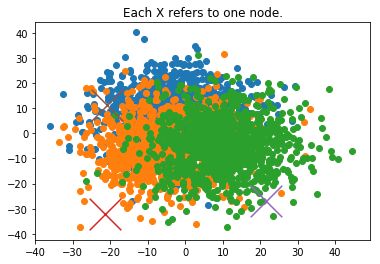

In [30]:
# Priors
n_nodes = 3
max_x = max(points[:, 0])
max_y = max(points[:, 1])
min_x = min(points[:, 0])
min_y = min(points[:, 1])

orig_nodes = [[random.uniform(min_x, max_x), random.uniform(min_y, max_y)]for _ in range(n_nodes)]
orig_nodes = np.array(orig_nodes)

def plt_nodes(node_list):
    for node in node_list:
        plt.scatter(*node, marker='x', s=1000)

plt_points(cluster_list)
plt_nodes(orig_nodes)
plt.title("Each X refers to one node.")

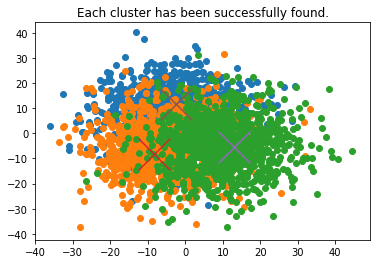

In [32]:
# Now let's try to find the 3 clusters, but first calculate some helper functions

# This function is step 2
def find_nearest_cluster(points, centers):
    # Calcualte the distance between each point and centets
    distance_matrix = np.zeros((points.shape[0], centers.shape[0]))
    
    for idx, center in enumerate(centers):
        distance_matrix[:, idx] = np.linalg.norm(points-center, axis=1)
    # Get k nearest points
    cluster_idx = np.argmin(distance_matrix, axis=1)

    return cluster_idx

# This function is step 3
def calculate_update_average(nearest_points, center):
    if nearest_points.size:
        return np.average(nearest_points, axis=0)
    else:
        return center


nodes = copy.copy(orig_nodes)
n_iterations = 100

# Repeating step 2 and step 3
for idx in range(n_iterations):
    cluster_idx = find_nearest_cluster(points, nodes)
    for node_idx, node in enumerate(nodes):
        nodes[node_idx] = calculate_update_average(points[cluster_idx == node_idx, :], node)

plt_points(cluster_list)
plt_nodes(nodes) 
plt.title("Each cluster has been successfully found.")
plt.show()

### Things to remember
* k-Means is a clustering algorithm
* You need prior knowledge
* Not learned

### What can it be used for
* You can use k-means on any features you want e.g. I have seen demos, where people classify images using feature extraction and after wards matching to a node (which is a class)